In [1]:
import orchest
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.7/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
data = orchest.get_inputs()
model,test,f1_score,accuracy_score = data["ensemble"]
total_score = data["eval"]

In [3]:
total_score.append(['Ensemble',f1_score,accuracy_score])
total_score

[['LGBM', 0.7274275979557071, 0.7898883782009193],
 ['RF', 0.7343336275375111, 0.8023637557452397],
 ['LR', 0.7532244196044712, 0.8115561391989494],
 ['NB', 0.7529610829103216, 0.8082731451083388],
 ['Ensemble', 0.7347670250896057, 0.8056467498358503]]

In [4]:
Scoring = pd.DataFrame(total_score,columns=['Model','F1 Score','Accuracy Score'])
Scoring

,Model,F1 Score,Accuracy Score
0,LGBM,0.727428,0.789888
1,RF,0.734334,0.802364
2,LR,0.753224,0.811556
3,NB,0.752961,0.808273
4,Ensemble,0.734767,0.805647


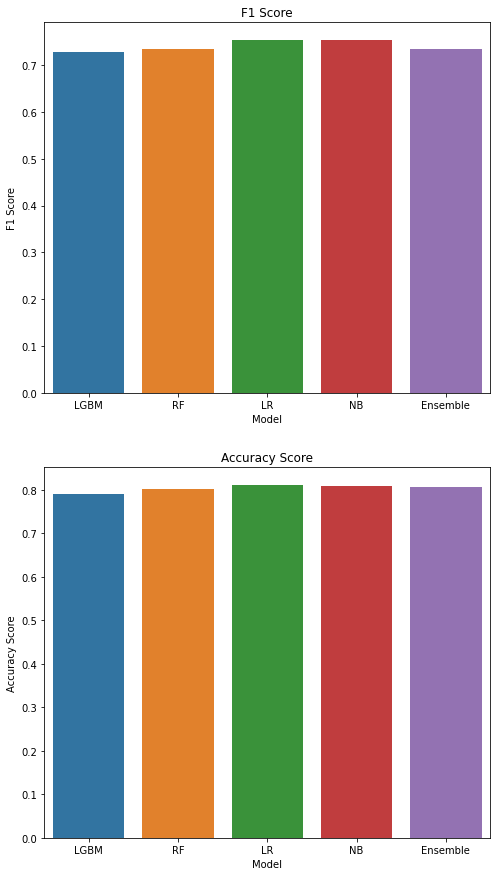

In [5]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (8, 15))

sns.barplot(x="Model", y="F1 Score", data=Scoring,ax=ax1)
ax1.set_title("F1 Score", fontsize = 12);
sns.barplot(x="Model", y="Accuracy Score", data=Scoring,ax=ax2)
ax2.set_title("Accuracy Score", fontsize = 12);

In [6]:
orchest.output((model,test),name="sub")